In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Input\H_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* **Split train data to train (%80) and validation (%20)**

In [22]:
X = data[['YearBuilt', 'GarageArea', 'PoolArea', 'FullBath', '1stFlrSF', '2ndFlrSF']].values
Y = data[['SalePrice']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,

((1314, 6), (146, 6), (1314, 1), (146, 1))

* **Implement a neural network model for predict house sales prices**

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'mae')

In [25]:
output = model.fit(X_train, Y_train, epochs=140)

Epoch 1/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 185235.3281
Epoch 2/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182167.3438
Epoch 3/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180158.9062
Epoch 4/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 185060.2656
Epoch 5/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 179814.8281
Epoch 6/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183202.4531
Epoch 7/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180382.2344
Epoch 8/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181756.8750
Epoch 9/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183689.2500
Epoch 10/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179494.8281
Epoch 11/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182203.5938
Epoch 12/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 180782.5781
Epoch 13/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182735.7344
Epoch 14/140
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181623.0625
E

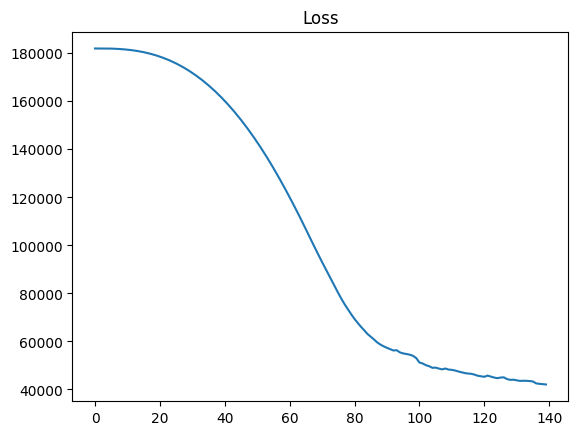

In [27]:
plt.plot(output.history['loss'])
plt.title("Loss")
plt.show()

* **Evaluate your trained model on validation data (You should achieve an loss < $50000)**

In [28]:
loss = model.evaluate(X_train, Y_train)
loss

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43445.3711  


41898.01953125

* **Predict yourself house price with your trained model**

In [29]:
my_house = np.array([[2004, 1850, 0, 2, 750, 0]])
model.predict(my_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


array([[171415.19]], dtype=float32)

* **Save your trained model as a `*.h5` extension file**

In [30]:
model.save('Output\model.h5')

* **test file prediction for kaggle competition**

In [32]:
data = pd.read_csv('Input\H_test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [33]:
X = data[['YearBuilt', 'GarageArea', 'PoolArea', 'FullBath', '1stFlrSF', '2ndFlrSF']].values
X.shape

(1459, 6)

In [34]:
Prediction = np.array(model.predict(X)).reshape(-1,)
Prediction = pd.DataFrame({'SalePrice':pd.Series(Prediction, index=data['Id'])})
Prediction.head()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,SalePrice
Id,
1461,171412.093750
1462,127228.007812
1463,171412.093750
1464,171412.093750
1465,171412.093750


In [49]:
Prediction.to_csv('Output\H_test_prediction.csv')